In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.metrics import r2_score
import matplotlib.ticker as mticker
from lmfit.models import PowerLawModel

# Global plot parameters
plt.rcParams.update({'font.size':20, 'lines.markersize':9})
plt.rcParams.update({'mathtext.fontset':'cm'})
plt.rcParams.update({'font.family':'Times New Roman'})

In [2]:
def power_fit_lmfit(params, x, y):
        a = params['a']
        b = params['b']
        y_fit = a*x**b
        
        return y_fit-y

def func_powerlaw(x, a, b):
        return a*x**b

def calc_rsquared(x, y, amplitude, exponent):
    yhat = func_powerlaw(x, amplitude, exponent)

    return r2_score(y, yhat)

In [3]:
dataBase_path = r'./'
dataBase_file = r'gabrielli_von_Karman.ods'

In [4]:
data_path = Path(dataBase_path, dataBase_file)
gDF = pd.read_excel(data_path)

In [6]:
# break up the data frame into perspective locomotion modes
modes = gDF['Type'].unique()

g_dfs = [gDF[gDF['Type']==type] for type in modes]

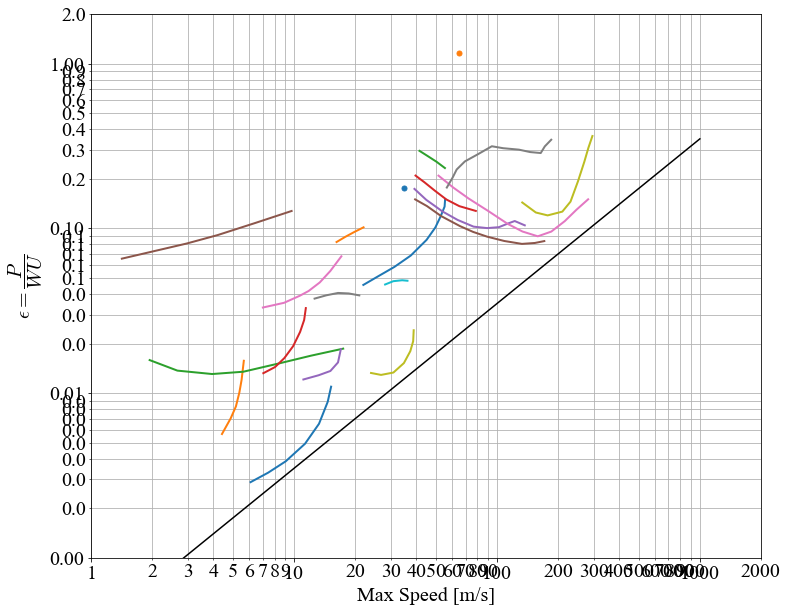

In [54]:
fig1, ax1 = plt.subplots(figsize=(12,10), facecolor='w')


for i, mode in enumerate(modes):
        if g_dfs[i]['Max Speed [m/s]'].values.shape[0] > 1:
                ax1.plot(g_dfs[i]['Max Speed [m/s]'].values, g_dfs[i]['epsilon'].values, linewidth=2)
        else:
                ax1.scatter(g_dfs[i]['Max Speed [m/s]'].values, g_dfs[i]['epsilon'].values, s=25)

dx = np.linspace(1, 1e3, 50)
ax1.plot(dx, 0.00035*dx**1, 'k')

ax1.set_xlabel('Max Speed [m/s]')
ax1.set_ylabel('$\epsilon = \dfrac{P}{WU}$')

ax1.set_xlim([1, 2000])
ax1.set_ylim([0.001, 2])
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.grid(which='both')
ax1.get_xaxis().set_major_formatter(mticker.ScalarFormatter())
ax1.get_xaxis().set_minor_formatter(mticker.ScalarFormatter())
ax1.get_yaxis().set_minor_formatter(mticker.ScalarFormatter())
ax1.get_yaxis().set_major_formatter(mticker.ScalarFormatter())
#fig1.savefig('cot_j-kgm.pdf', facecolor='w', dpi=300, bbox_inches='tight')